# Testing the effects of increasing noise

In the full SOSP model, it seems that the more dimensions there are, the larger the effect of noise, for a fixed noise magnitude.

I'm going to try to see what happens in 1D with increasing noise.

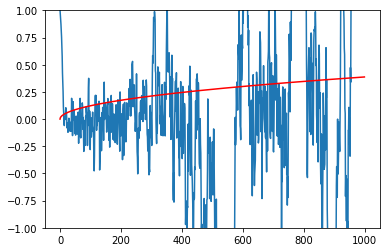

In [10]:
import numpy as np
import matplotlib.pyplot as plt

center = np.array([0.])
harmony = 1.0
gamma = 0.4
dt = 0.1  # orig. 0.01
max_time = 1000
noise_mag = np.linspace(0, 0.75, max_time)

def phi(x):
    return np.exp(-(x - center)**2/gamma)

def step(x):
    return -2./gamma * harmony * (x - center) * phi(x)

xhist = np.zeros(max_time)
xhist[0] = 1.
for t in range(xhist.size-1):
    xhist[t+1] = xhist[t] + dt*step(xhist[t]) + np.sqrt(2*noise_mag[t]*dt)*np.random.normal(0, 1)

plt.plot(xhist)
plt.plot(np.sqrt(2*noise_mag*dt), 'r')
plt.ylim(-1, 1)
plt.show()

In [11]:
noise_mag[100]

0.07507507507507508

In [12]:
np.sqrt(2*noise_mag[100]*dt)

0.12253577034896797

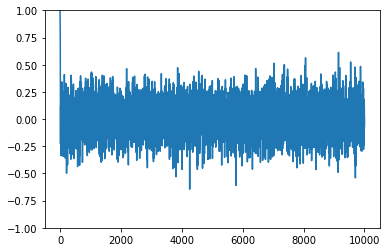

In [13]:
xhist = np.zeros(max_time*10)
xhist[0] = 1.
for t in range(xhist.size-1):
    xhist[t+1] = xhist[t] + dt*step(xhist[t]) + np.sqrt(2*noise_mag[100]*dt)*np.random.normal(0, 1)

plt.plot(xhist)
plt.plot(np.sqrt(2*noise_mag[100]*dt), 'r')
plt.ylim(-1, 1)
plt.show()

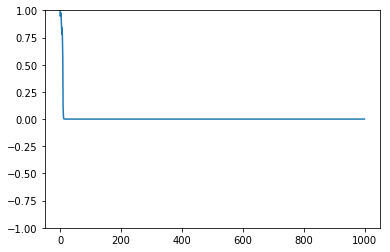

In [14]:
# Trying out multiplicative noise
xhist = np.zeros(max_time)
xhist[0] = 1.
noise_mag = 0.1
for t in range(xhist.size-1):
    xhist[t+1] = xhist[t] + dt*step(xhist[t]) + np.sqrt(2*noise_mag*dt)*np.random.normal(0, 1)*step(xhist[t])

plt.plot(xhist)
plt.plot(np.sqrt(2*noise_mag*dt), 'r')
plt.ylim(-1, 1)
plt.show()

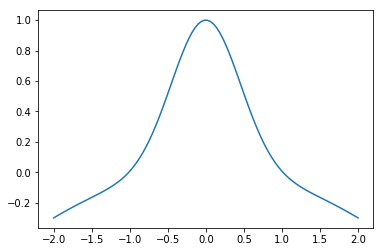

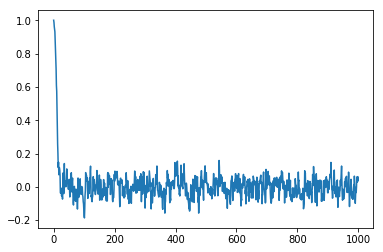

In [19]:
# Now trying out baseline constraint
beta = 0.075
def phi2(x):
    return np.exp(-(x - center)**2/gamma) - np.clip(beta*x**2, -0.001, 1000)

def step2(x):
    return -2./gamma * harmony * (x - center) * phi2(x) + (beta/2)*x

max_time = 1000
noise_mag = 0.01  #np.linspace(0, 0.25, max_time)
xhist = np.zeros(max_time)
xhist[0] = 1.
for t in range(max_time-1):
    xhist[t+1] = xhist[t] + dt*step2(xhist[t]) + np.sqrt(2*noise_mag*dt)*np.random.normal(0, 1)

xaxis = np.linspace(-2., 2, 100)
yvals = [phi2(x) for x in xaxis]
plt.plot(xaxis, yvals)
plt.show()

plt.plot(xhist)
plt.plot(np.sqrt(2*noise_mag*dt), 'r')
#plt.ylim(-1.1, 1.1)
plt.show()